<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 11: 2D List - Convolutional calculation

## Tích chập (Convolution)

$$
A = \begin{bmatrix}
 1&  2& 3 \\
 4&  5& 6 \\
 7&  8& 9
\end{bmatrix},
Kernal \text{ } B=\begin{bmatrix}
 2& 4 \\
 1& 3
\end{bmatrix} \\
Kernal \text{ } C = \begin{bmatrix}
 1&  1& 1 \\
 0&  0& 0 \\
 1&  1& 1
\end{bmatrix} \\
1. \text{ Hãy tính Convolutional khi áp dụng Kernal B vào A} \\
2. \text{ Hãy tính Convolutional khi áp dụng Kernal C vào A}
$$

In [ ]:
def convolution(A, kernal):
  result = []
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
      data_point = A[i][j]
      sum = 0
      if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])): # prevent overflow
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              sum += A[m][n] * kernal[m - i][n - j]
          row.append(sum)
    if row:
      result.append(row)
  return result


In [ ]:
A = [[1,2,3],[4,5,6],[7,8,9]]
kernal_B = [[2,4],[1,3]]
conv_AB = convolution(A,kernal_B)

kernal_C = [[1,1,1],[0,0,0],[1,1,1]]
conv_AC = convolution(A,kernal_C)

In [ ]:
import numpy as np

print(f"1. Convolution of A:\n {np.array(A)} \n with kernel B:\n {np.array(kernal_B)} \n is \n {np.array(conv_AB)}")
print(f"\n 2. Convolution of A:\n {np.array(A)} \n with kernel C:\n {np.array(kernal_C)} \n is \n {np.array(conv_AC)}")

1. Convolution of A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
 with kernel B:
 [[2 4]
 [1 3]] 
 is 
 [[29 39]
 [59 69]]

 2. Convolution of A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
 with kernel C:
 [[1 1 1]
 [0 0 0]
 [1 1 1]] 
 is 
 [[30]]


## Padding

$$
A = \begin{bmatrix}
 0&  0& 0 \\
 0&  4& 0 \\
 0&  1& 0
\end{bmatrix},
Kernal \text{ } B=\begin{bmatrix}
 1& 1 \\
 1& 1
\end{bmatrix} \\
Kernal \text{ } C = \begin{bmatrix}
 0&  1& 0 \\
 0&  1& 0 \\
 0&  1& 0
\end{bmatrix} \\
1. \text{ Hãy tính Convolutional khi áp dụng Kernal B vào A có sử dụng zero padding} \\
2. \text{ Hãy tính Convolutional khi áp dụng Kernal C vào A có sử dụng zero padding}
$$

In [ ]:
def zero_padding(A):
  m_padding = [[0 for _ in range(len(A) + 2)] for _ in range(len(A[0]) + 2)]
  for i in range(len(m_padding)):#row
    for j in range(len(m_padding)): #column
        # add matrix A inside a new matrix
        should_add_matrix_a_element = (i >= 1) and (i < len(m_padding) - 1) and (j >= 1) and (j < len(m_padding[0]) - 1)
        if should_add_matrix_a_element:
          # print(f"ij{i},{j}, A: {A[i - 1][j - 1]}")
          m_padding[i][j] = A[i - 1][j - 1]
  # print(m_padding)
  return m_padding

In [ ]:
A_test = [[1,2,3],[4,5,6],[7,8,9]]
zero_padding(A_test)

[[0, 0, 0, 0, 0],
 [0, 1, 2, 3, 0],
 [0, 4, 5, 6, 0],
 [0, 7, 8, 9, 0],
 [0, 0, 0, 0, 0]]

In [ ]:
A = [[0,0,0],[0,4,0],[0,1,0]]
kernal_B = [[1,1],[1,1]]
kernal_C = [[0,1,0],[0,1,0],[0,1,0]]
A_zero_padding = zero_padding(A)

conv_AB = convolution(A_zero_padding, kernal_B)
conv_AC = convolution(A_zero_padding, kernal_C)

In [ ]:
import numpy as np

print(f"1. Convolution of A:\n {np.array(A)} \n with kernel B with zero padding:\n {np.array(kernal_B)} \n is \n {np.array(conv_AB)}")
print(f"\n2. Convolution of A:\n {np.array(A)} \n with kernel B with zero padding:\n {np.array(kernal_C)} \n is \n {np.array(conv_AC)}")

1. Convolution of A:
 [[0 0 0]
 [0 4 0]
 [0 1 0]] 
 with kernel B with zero padding:
 [[1 1]
 [1 1]] 
 is 
 [[0 0 0 0]
 [0 4 4 0]
 [0 5 5 0]
 [0 1 1 0]]

2. Convolution of A:
 [[0 0 0]
 [0 4 0]
 [0 1 0]] 
 with kernel B with zero padding:
 [[0 1 0]
 [0 1 0]
 [0 1 0]] 
 is 
 [[0 4 0]
 [0 5 0]
 [0 5 0]]


## Max Pooling và Average Pooling

$$
A = \begin{bmatrix}
 0&  0&  0& 4 \\
 0&  4&  0& 2 \\
 0&  1&  0& 2 \\
 0&  3&  0& 2
\end{bmatrix}
$$

In [ ]:
  def convolution_max_pooling(A, kernal, stride=1):
    result = []
    for i in range(0, len(A), stride): #row A
      row = []
      for j in range(0, len(A[0]), stride): #col A
        data_point = max = A[i][j]
        if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])):
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              if max < A[m][n]:
                max = A[m][n]
          row.append(max)
      if row:
        result.append(row)
    return result

In [ ]:
def convolution_avg_pooling(A, kernal, stride=1):
    result = []
    num_elements_windowsize = len(kernal) * len(kernal[0])
    for i in range(0, len(A), stride): #row A
      row = []
      for j in range(0, len(A[0]), stride): #col A
        data_point = A[i][j]
        avg = 0
        if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])):
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              avg += A[m][n]
          row.append(float(avg / num_elements_windowsize))
      if row:
        result.append(row)
    return result

In [ ]:
A = [[0,0,0,4],[0,4,0,2],[0,1,0,2],[0,3,0,2]]
kernal_B = [[1,1],[1,1]] #window size

conv_max_pooling = convolution_max_pooling(A, kernal_B, stride=2)
conv_avg_pooling = convolution_avg_pooling(A, kernal_B, stride=2)
print(f"Max pooling for A: {conv_max_pooling}")
print(f"Max pooling for A: {conv_avg_pooling}")

Max pooling for A: [[4, 4], [3, 2]]
Max pooling for A: [[1.0, 1.5], [1.0, 1.0]]


# Day 12: The Knight’s tour problem

## Bài tập


In [ ]:
def print_board(board):
  n = len(board)
  for i in range(n):
    for j in range(n):
      print(board[i][j], end = ' ')
    print()

In [ ]:
def is_coordinate_on_the_board(new_x, new_y, size_of_chessboard):
  return (0 <= new_x < size_of_chessboard) and (0 <= new_y < size_of_chessboard)

In [ ]:
def solve_knight_tour(size_of_chessboard, start_x, start_y):
  #Create chessboard
  board = [[-1 for _ in range(size_of_chessboard)] for _ in range(size_of_chessboard)]
  board[start_x][start_y] = 1
  move_count = 1

  # move_x and move_y define next move of Knight.
  # move_x is for next value of x coordinate
  # move_y is for next value of y coordinate
  move_x = [2, 1, -1, -2, -2, -1, 1, 2]
  move_y = [1, 2, 2, 1, -1, -2, -2, -1]

  if knight_tour_utils(start_x, start_y, move_x, move_y, move_count, board, size_of_chessboard):
    # print("Found solution!")
    return board
  else:
    print("No solution exist!")
    return None

In [ ]:
def knight_tour_utils(current_x, current_y, dx, dy, move_count, board, size_of_chessboard):
  if not is_coordinate_on_the_board(current_x, current_y, size_of_chessboard):
    print(f"Coordinate ({current_x}, {current_y}) is not on the board!")
    return False
  if move_count == size_of_chessboard**2:
    return True # Solution found

  for i in range(len(dx)):
    new_x = current_x + dx[i]
    new_y = current_y + dy[i]
    # print(f"new_x, new_y= ({new_x}, {new_y})")
    if is_coordinate_on_the_board(new_x, new_y, size_of_chessboard):
      if board[new_x][new_y] == -1: #should_move
        board[new_x][new_y] = move_count + 1 # inscrease current move count
        if knight_tour_utils(new_x, new_y, dx, dy, move_count + 1, board, size_of_chessboard):
          return True
        board[new_x][new_y] = -1 # Backtrack
  return False

In [ ]:
n = 5 # size of chessboard
tests = [[0,0], [2,2]] # starting at (x, y)

print(f"Chest size ({n}x{n})")
for i, start in enumerate(tests):
  board = solve_knight_tour(n, start_x=start[0], start_y=start[1])
  print(f"\n{i+1}. The result of the knight's problem when starting at ({start[0]}, {start[1]}) is")
  print_board(board)

Chest size (5x5)

1. The result of the knight's problem when starting at (0, 0) is
1 6 15 10 21 
14 9 20 5 16 
19 2 7 22 11 
8 13 24 17 4 
25 18 3 12 23 

2. The result of the knight's problem when starting at (2, 2) is
23 10 15 4 25 
16 5 24 9 14 
11 22 1 18 3 
6 17 20 13 8 
21 12 7 2 19 


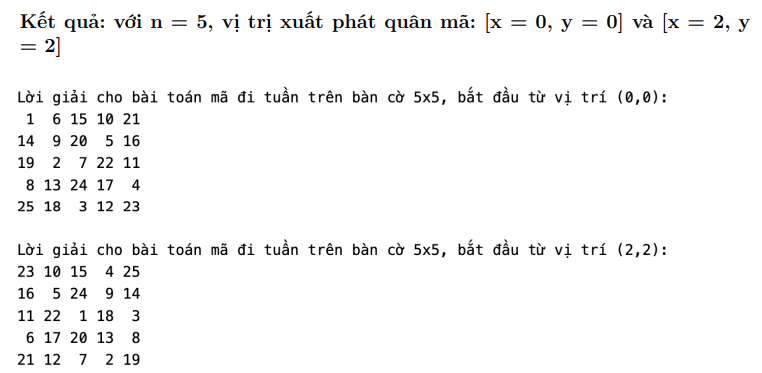

# Day 13

In [ ]:
import numpy as np

## Phép Cộng và Trừ Ma Trận

In [ ]:
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

C = np.add(A, B)
D = np.subtract(A, B)
print(f"A + B = \n{C}")
print(f"A - B = \n{D}")

A + B = 
[[ 6  8]
 [10 12]]
A - B = 
[[-4 -4]
 [-4 -4]]


In [ ]:
C = [[2, -3], [4, -5]]
D = [[4, -5], [-2, 8]]

print(f"C + D = \n{np.add(C, D)}")
print(f"C - D = \n{np.subtract(C, D)}")

C + D = 
[[ 6 -8]
 [ 2  3]]
C - D = 
[[ -2   2]
 [  6 -13]]


## Phép Nhân Hadamard E ⊙ F

In [ ]:
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

H = np.multiply(A, B)
print(f"Hadamard of A and B = \n{H}")

Hadamard of A and B = 
[[ 5 12]
 [21 32]]


In [ ]:
E = [[0, 1, 2], [3, 4, 5]]
F = [[5, 4, 3], [2, 1, 0]]

H = np.multiply(E, F)
print(f"Hadamard of E and F = \n{H}")

## Tích Vô Hướng (Dot Product)


In [ ]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]

dot_v1v2 = np.dot(v1, v2)
print(f"{dot_v1v2}")

32


## Tích Chập (Convolution)

In [ ]:
def convolution_np(A, kernal):
  result = []
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
      data_point = A[i][j]
      sum = 0
      if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])): # prevent overflow
          m_from_data = [[A[m][n] for n in range(j, j + len(kernal[0]))] for m in range(i, i + len(kernal))]
          m_dot = np.multiply(m_from_data, kernal)
          sum = np.sum(m_dot)
          # for m in range(i, i + len(kernal)):
          #   for n in range(j, j + len(kernal[0])):
          #     sum += A[m][n] * kernal[m - i][n - j]
          row.append(sum)
    if row:
      result.append(row)
  return result

In [ ]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
K = [[1, 0], [0, -1]]

ConvAK = convolution_np(A, K)
print(f"{ConvAK}")

[[-4, -4], [-4, -4]]


## Xoay Vector Một Góc θ

In [5]:
import numpy as np

def rotate_vector(v, degree):
  R = np.array([
    [np.cos(degree), -np.sin(degree)],
    [np.sin(degree), np.cos(degree)]
  ])
  return np.dot(v, R)

v = np.array([1, 0])
theta = 45
print(f"{rotate_vector(v, theta)}")

[ 0.52532199 -0.85090352]


# Day 14
Numpy - Term frequency and Invert Document Frequency

## Bài tập

In [40]:
import numpy as np
import math

# Bước 1: Tạo tập tài liệu mẫu
documents = ["Tôi thích học AI", "AI là trí tuệ nhân tạo", " AGI là siêu trí tuệ nhân tạo"]
vocab = []
for doc in documents:
  for word in doc.split():
    if word not in vocab:
      vocab.append(word)
print(vocab)

['Tôi', 'thích', 'học', 'AI', 'là', 'trí', 'tuệ', 'nhân', 'tạo', 'AGI', 'siêu']


In [ ]:
# Bước 2: Tiền xử lý - tách từ và tính tần số
def compute_tf(doc) :
  pass

In [ ]:
# Bước 3: Tính toán IDF
def compute_idf(docs):
  pass

# Bước 4: Tính toán TF - IDF
def compute_tf_idf(tf ,idf):
  pass

# Day 15

## Bài tập

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dataset
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [33]:
def correlation(x ,y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  var_x2 = np.sum([(m - mean_x)**2 for m in x])
  var_y2 = np.sum([(n - mean_y)**2 for n in y])
  return np.sum((x - mean_x)*(y - mean_y)) / np.sqrt(var_x2 * var_y2)

 # Example usage:
list_features = ['TV', 'Radio', 'Newspaper', 'Sales']
x = data['TV']
y = data['Radio']
corr_xy = correlation(x , y)
print (f" Correlation between TV and Sales: {corr_xy:.4f}") ## Output : 0.0548

 Correlation between TV and Sales: 0.0548


In [34]:
for f1 in list_features:
  for f2 in list_features:
    corr = correlation(data[f1], data[f2])
    print (f" Correlation between {f1} and {f2}: {corr:.4f}")


 Correlation between TV and TV: 1.0000
 Correlation between TV and Radio: 0.0548
 Correlation between TV and Newspaper: 0.0566
 Correlation between TV and Sales: 0.9012
 Correlation between Radio and TV: 0.0548
 Correlation between Radio and Radio: 1.0000
 Correlation between Radio and Newspaper: 0.3541
 Correlation between Radio and Sales: 0.3496
 Correlation between Newspaper and TV: 0.0566
 Correlation between Newspaper and Radio: 0.3541
 Correlation between Newspaper and Newspaper: 1.0000
 Correlation between Newspaper and Sales: 0.1580
 Correlation between Sales and TV: 0.9012
 Correlation between Sales and Radio: 0.3496
 Correlation between Sales and Newspaper: 0.1580
 Correlation between Sales and Sales: 1.0000


## Bài tập mở rộng

In [24]:
data_corr = data.corr()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


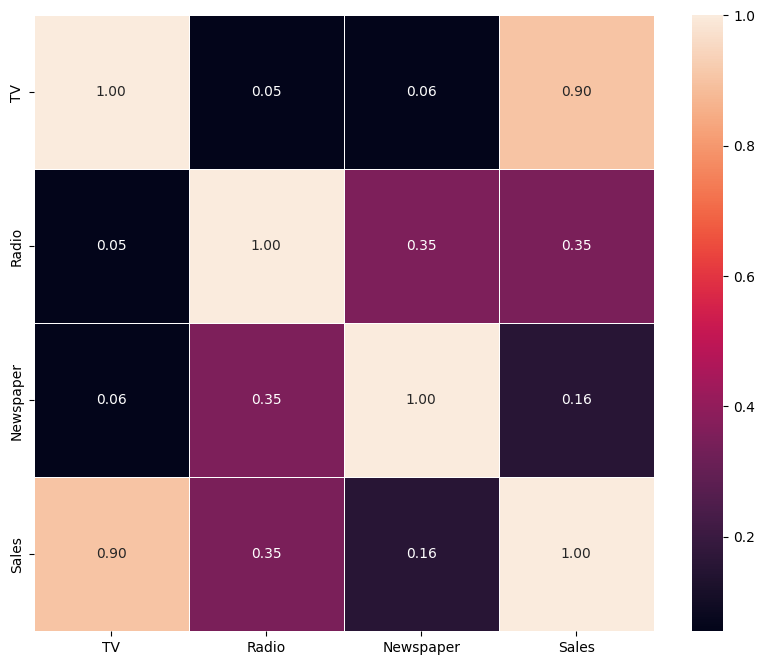

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

## Calculate coerelation here ##
plt.figure(figsize=(10,8))
print(data_corr)
sns.heatmap(data_corr, annot=True, fmt=".2f", linewidth=.5)
plt.show()